In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from collections import OrderedDict
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-appetency/sample_submission.csv
/kaggle/input/netflix-appetency/train.csv
/kaggle/input/netflix-appetency/test.csv


In [3]:
train_original = pd.read_csv('../input/netflix-appetency/train.csv')
x_train_original = train_original.copy()
x_train_original = x_train_original.drop(columns=['target','id'])
y_train = train_original.copy()['target']

test_original = pd.read_csv('../input/netflix-appetency/test.csv')
train_original

,id,target,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_497,feature_498,feature_499,feature_500,feature_501,feature_502,feature_503,feature_504,feature_505,feature_506
0,0,0,C0,C0,C1,C5,C11,37.560,54.756667,54.756667,...,0,0,0,0,0,0,0,0,0,0
1,1,0,C0,C0,C3,C5,C1,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,2,0,C0,C0,C3,C5,C2,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,3,0,C0,C0,C1,C5,C1,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4,4,1,C0,C0,C3,C3,C11,37.480,37.480000,37.161333,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99994,0,C0,C0,C3,C1,C11,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
69996,99996,0,C0,C0,C5,C5,C2,39.398,35.022000,45.645000,...,0,0,0,0,0,0,0,0,0,0
69997,99997,0,C0,C0,C3,C2,C11,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
69998,99998,0,C0,C0,C1,C5,C1,30.060,35.765000,35.765000,...,-99,0,-99,0,99,0,99,-99,0,99


# Dropping useless features

In [4]:
# we first drop the column not having more than two different values
n_unique = x_train_original.nunique(axis=0)
mask = n_unique<=1
features_to_ignore = x_train_original.columns[mask]
#print(features_to_ignore)
print(f'There are {len(features_to_ignore)}  columns to drop ')
x_train_original=x_train_original.drop(columns=features_to_ignore)
x_train_original

There are 63  columns to drop 


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_490,feature_492,feature_494,feature_496,feature_497,feature_499,feature_501,feature_503,feature_504,feature_506
0,C0,C0,C1,C5,C11,37.560,54.756667,54.756667,35.83,39.136667,...,0,0,0,0,0,0,0,0,0,0
1,C0,C0,C3,C5,C1,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,C0,C0,C3,C5,C2,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,C0,C0,C1,C5,C1,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4,C0,C0,C3,C3,C11,37.480,37.480000,37.161333,35.75,35.750000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,C0,C0,C3,C1,C11,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
69996,C0,C0,C5,C5,C2,39.398,35.022000,45.645000,30.83,30.830000,...,0,0,0,0,0,0,0,0,0,0
69997,C0,C0,C3,C2,C11,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
69998,C0,C0,C1,C5,C1,30.060,35.765000,35.765000,30.06,35.765000,...,-99,99,99,99,-99,-99,99,99,-99,99


# counting the number of different types presents in the data

In [5]:
def my_bar_plot(bins_name, bins_numel, title, figsize=None):
    fig = plt.figure(figsize=figsize)
    ax = plt.subplot(111)
    ax.bar(bins_name, bins_numel)
    ax.title.set_text(title)
    ax.plot()

220 columns of type int64
138 columns of type float64
86 columns of type object


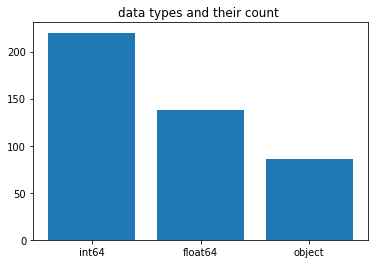

In [6]:
column_types, column_types_numel = np.unique(x_train_original.dtypes, return_counts=True)
column_types = [ ct.name for ct in column_types]

for ct, count in zip(column_types,column_types_numel):
    print(f'{count} columns of type {ct}')


my_bar_plot(column_types, column_types_numel,"data types and their count ")
#ax = plt.subplot(111)
#ax.bar(column_types, column_types_numel)
#ax.title.set_text("data types and their count ")
#ax.plot()

int64_columns = [c for c in x_train_original.columns if x_train_original[c].dtype.name=='int64']
float64_columns = [c for c in x_train_original.columns if x_train_original[c].dtype.name=='float64']
object_columns = [c for c in x_train_original.columns if x_train_original[c].dtype.name=='object']

In [7]:
x_train_original[object_columns]

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_16,feature_17,feature_18,feature_19,feature_20,...,feature_288,feature_289,feature_290,feature_291,feature_292,feature_293,feature_336,feature_337,feature_338,feature_371
0,C0,C0,C1,C5,C11,C0,C60,C17795,C413,C3620,...,C130,C46,C22,C10,C7,C6,C0,C0,C0,C0
1,C0,C0,C3,C5,C1,C2,C50,C14050,C413,C2819,...,C105,C36,C18,C6,C3,C2,C0,C0,C0,C0
2,C0,C0,C3,C5,C2,C1,C76,C23471,C413,C4794,...,C105,C36,C18,C6,C3,C2,C0,C0,C0,C0
3,C0,C0,C1,C5,C1,C0,C58,C16929,C413,C3344,...,C83,C28,C13,C2,C1,C0,C0,C0,C0,C0
4,C0,C0,C3,C3,C11,C2,C48,C13941,C413,C2753,...,C93,C24,C11,C2,C1,C0,C0,C0,C0,C1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,C0,C0,C3,C1,C11,C0,C87,C26862,C413,C5520,...,C86,C31,C13,C2,C1,C0,C0,C0,C0,C1
69996,C0,C0,C5,C5,C2,C2,C13,C3347,C413,C593,...,C130,C46,C22,C10,C7,C6,C0,C0,C0,C0
69997,C0,C0,C3,C2,C11,C0,C57,C16255,C413,C3237,...,C87,C32,C14,C2,C1,C0,C0,C0,C0,C1
69998,C0,C0,C1,C5,C1,C2,C97,C28322,C413,C6037,...,C130,C46,C22,C10,C7,C6,C0,C0,C0,C1


The objet dtype correspond to string in Python. And we can see that column with dtype object start with the letter 'C'. Does that C stand for categorical? 

# Number of different values per column of each type

In [8]:
def dtype_and_nunique(dataframe,dtype):
    """
    input:
        + dataframe, a panda dataframe
        + dtype, a dtype to filter the dataframe columns
    output:
        + a dictionary where the pair the key represent the number of distinct values in the dataframe columns 
            and the values of the dictionary contains a list a the column having dtype=dtype and key different values. 
            For example, if we have the pair Index(['feature_0', 'feature_1', 'feature_23'],dtype='object')),
            it mean that the columns 'feature_0', 'feature_1', 'feature_23' have values of type dtype and that they have only two distinct values
    """
    
    # get all the columns with dtype=dtype
    dtype_columns = [c for c in dataframe.columns if dataframe[c].dtype.name==dtype] 
    #print(dtype_columns)
    
    # restrict the dataframe to those columns only
    restricted_df = dataframe[dtype_columns]
    
    # use nunique to get the number of unique values for each column
    nunique = restricted_df.nunique(axis=0)
    #print(nunique)
    
    # gather the columns having 
    
    dict_nunique = {}
    for i in nunique:
        columns = restricted_df.columns[nunique==i]
        dict_nunique[i]= columns #list(columns)
        #print(columns)
        #if i<= 150:
        #    print(f' {len(columns)} with {i} different values. ')
    
    dict_nunique = OrderedDict(sorted(dict_nunique.items()))
    
    return dict_nunique

In [9]:
int64_dict_nunique = dtype_and_nunique(x_train_original,'int64')
float64_dict_nunique = dtype_and_nunique(x_train_original,'float64')
object_dict_nunique = dtype_and_nunique(x_train_original,'object')


In [10]:
def my_bar_plot_2(dtype_columns, figsize, title):
    column_nunique, column_nunique_numel = np.unique(x_train_original[dtype_columns].nunique(), return_counts=True)
    column_types = [ str(c_) for c_ in column_nunique]

    my_bar_plot(column_types, column_nunique_numel,title,figsize=figsize)

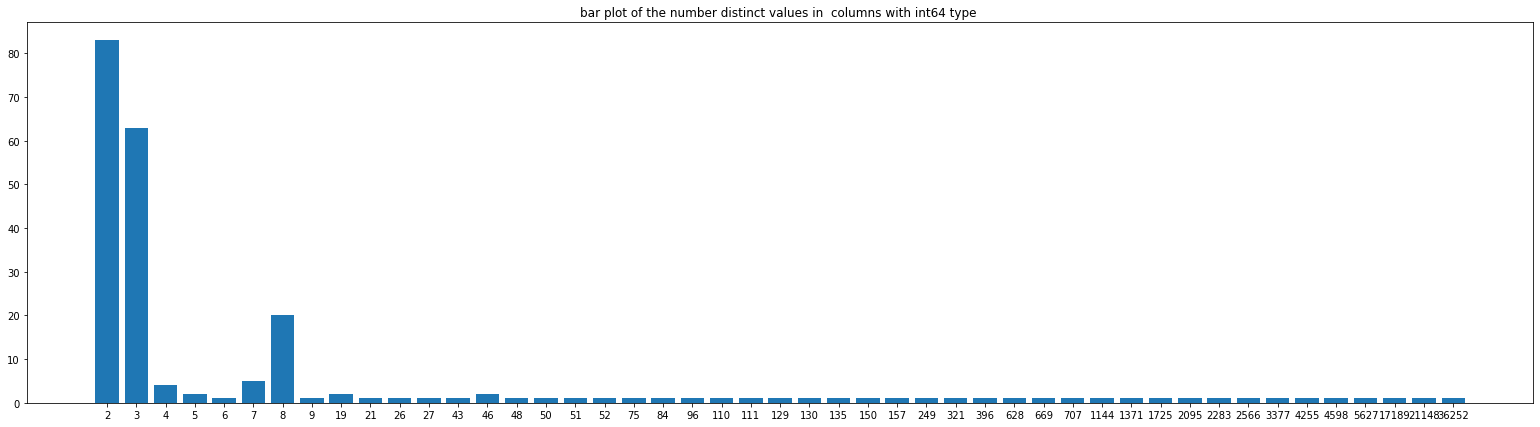

In [11]:
my_bar_plot_2(int64_columns,(27,7), 'bar plot of the number distinct values in  columns with int64 type ')

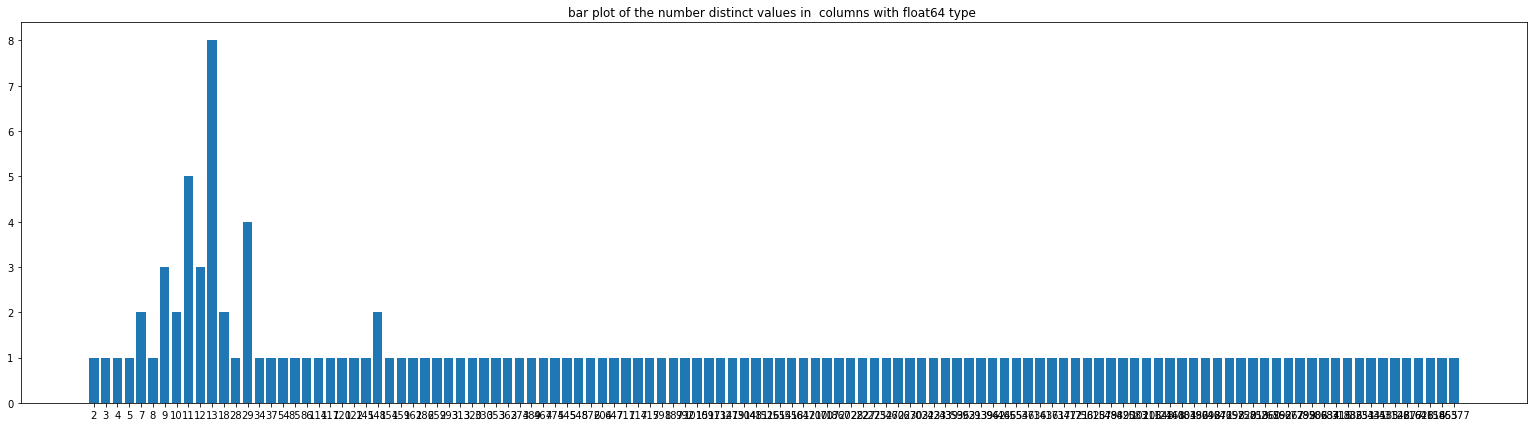

In [12]:
my_bar_plot_2(float64_columns,(27,7), 'bar plot of the number distinct values in  columns with float64 type ')


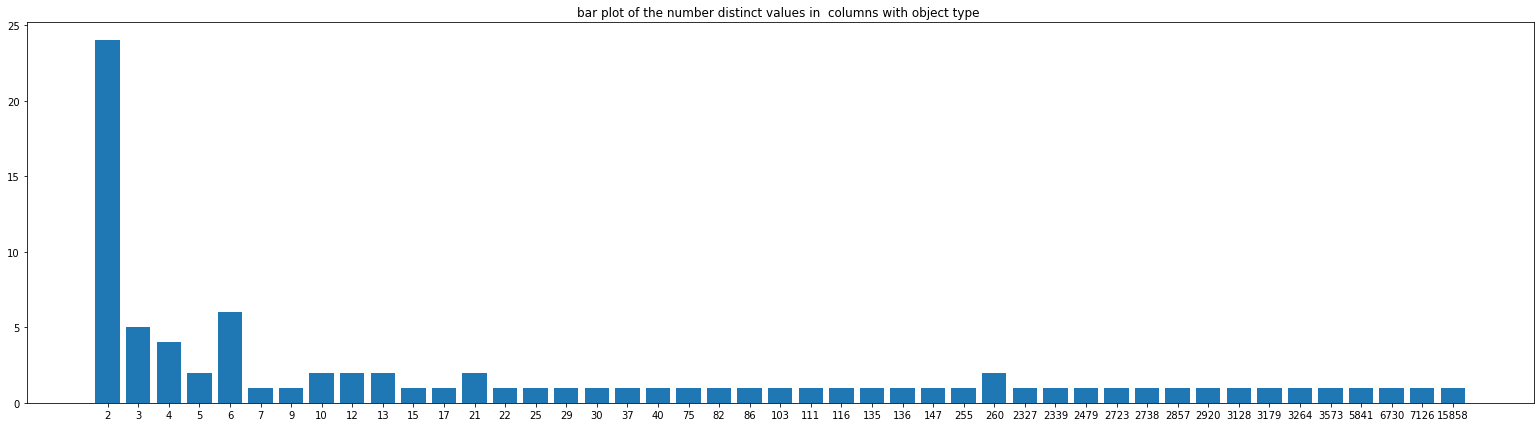

In [13]:
my_bar_plot_2(object_columns,(27,7), 'bar plot of the number distinct values in  columns with object type ')


# About NaNs

In [14]:
columns_with_nan = [ c for c in x_train_original.columns if x_train_original[c].isnull().any()==True]

print(f'There are {len(columns_with_nan)} with missing values.')

There are 69 with missing values.


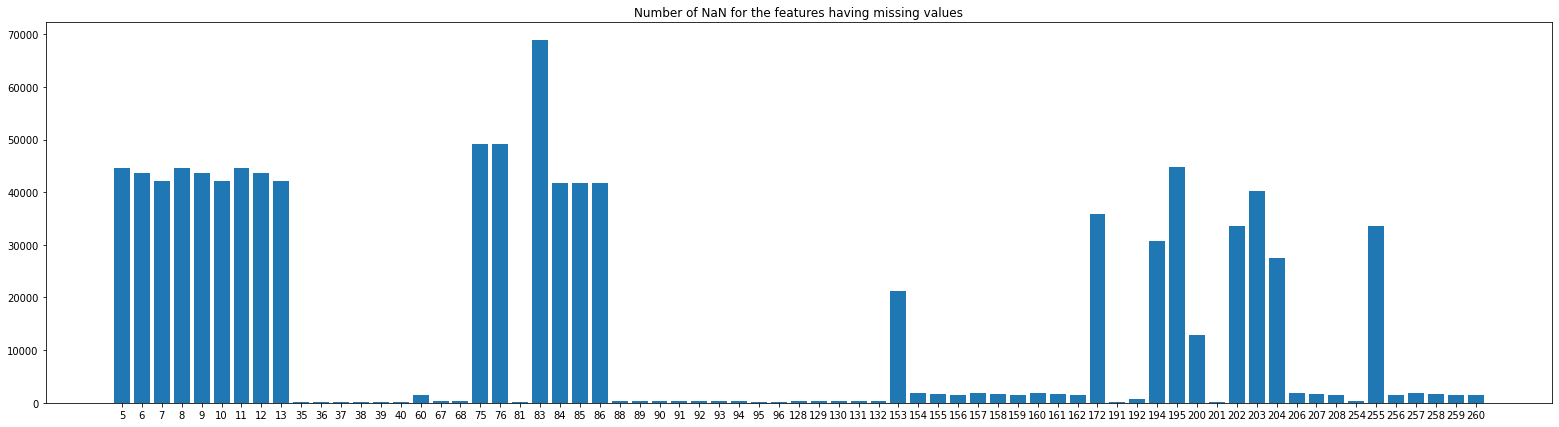

In [15]:
num_nan = x_train_original[columns_with_nan].isnull().sum()
c_for_bar_plot = [ c.split('_')[1] for c in columns_with_nan]
my_bar_plot(c_for_bar_plot,num_nan,'Number of NaN for the features having missing values', figsize=(27,7))

Some columns have more than half the  values missing. The most extreme case is the 'feature_83' with 68824/70000 missing values?  So what do we do? Discard them completely (and some information)? 